In [1]:
# Import packages and functions
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn import tree, metrics
from palmerpenguins import load_penguins

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
# Load the penguins data from palmerpenguins package
penguins = load_penguins()

# Drop penguins with missing values
penguins = penguins.dropna()

# Create a new data frame with only Gentoo penguins
gentoo = penguins[penguins['species'] == 'Gentoo'].copy()

# Calculate summary statistics using .describe()
gentoo.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,119,119,119.000000,119.000000,119.000000,119.000000,119,119.000000
unique,1,1,NaN,NaN,NaN,NaN,2,NaN
top,Gentoo,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,119,119,NaN,NaN,NaN,NaN,61,NaN
mean,NaN,NaN,47.568067,14.996639,217.235294,5092.436975,NaN,2008.067227
std,NaN,NaN,3.106116,0.985998,6.585431,501.476154,NaN,0.789025
min,NaN,NaN,40.900000,13.100000,203.000000,3950.000000,NaN,2007.000000
25%,NaN,NaN,45.350000,14.200000,212.000000,4700.000000,NaN,2007.000000
50%,NaN,NaN,47.400000,15.000000,216.000000,5050.000000,NaN,2008.000000
75%,NaN,NaN,49.600000,15.750000,221.500000,5500.000000,NaN,2009.000000


In [3]:
# Create a matrix of input features with sex, flipper length, and bill length
X = gentoo[['sex', 'flipper_length_mm', 'bill_length_mm']]
X

,sex,flipper_length_mm,bill_length_mm
152,female,211.0,46.1
153,male,230.0,50.0
154,female,210.0,48.7
155,male,218.0,50.0
156,male,215.0,47.6
...,...,...,...
270,female,214.0,47.2
272,female,215.0,46.8
273,male,222.0,50.4
274,female,212.0,45.2


`DecisionTreeRegressor` only takes numerical values as features, which means features like `sex` and `island` won't work. 

Thus, categorical features must be encoded as dummy variables that indicate which category the individual falls into.  This encoding is done in `pandas` with `get_dummies`.

In [4]:
# Use pd.get_dummies to convert sex to a binary (0/1) dummy variable
X_dummies = pd.get_dummies(X, drop_first=True)
X_dummies

,flipper_length_mm,bill_length_mm,sex_male
152,211.0,46.1,0
153,230.0,50.0,1
154,210.0,48.7,0
155,218.0,50.0,1
156,215.0,47.6,1
...,...,...,...
270,214.0,47.2,0
272,215.0,46.8,0
273,222.0,50.4,1
274,212.0,45.2,0


The `drop_first=True` option creates a single dummy variable, instead of two. One dummy variable completely describes sex in this dataset.

- `sex_male=0`: female
- `sex_male=1`: male

In [5]:
y = gentoo['body_mass_g']

regtreeModel = DecisionTreeRegressor(max_depth=2, min_samples_leaf=2)
regtreeModel.fit(X_dummies, y)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=2)

In [6]:
# The print() statement outputs a text version of the regression tree
print(export_text(regtreeModel, feature_names=X.columns.to_list()))

|--- bill_length_mm <= 0.50
|   |--- sex <= 210.50
|   |   |--- value: [4472.73]
|   |--- sex >  210.50
|   |   |--- value: [4806.25]
|--- bill_length_mm >  0.50
|   |--- flipper_length_mm <= 47.45
|   |   |--- value: [5238.46]
|   |--- flipper_length_mm >  47.45
|   |   |--- value: [5551.56]



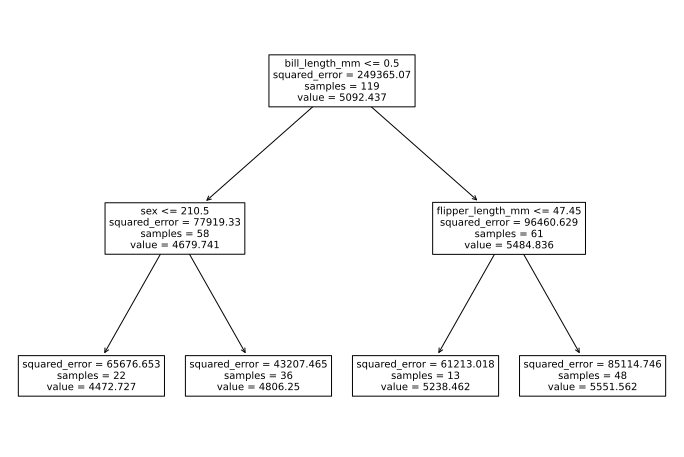

In [7]:
# Using tree.plot_tree() makes a cleaner figure

# Resize the plotting window
plt.figure(figsize=[12, 8])

p = tree.plot_tree(
    regtreeModel,
    feature_names=X.columns,
    class_names=y.unique(),
    filled=False,
    fontsize=10,
)

In [8]:
# Add the predictions to the original data set
gentoo['pred'] = regtreeModel.predict(X_dummies)
gentoo

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,pred
152,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female,2007,4806.250000
153,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,male,2007,5551.562500
154,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female,2007,4472.727273
155,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,male,2007,5551.562500
156,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,male,2007,5551.562500
...,...,...,...,...,...,...,...,...,...
270,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,female,2009,4806.250000
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009,4806.250000
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009,5551.562500
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009,4806.250000


Text(0, 0.5, 'Predicted body mass')

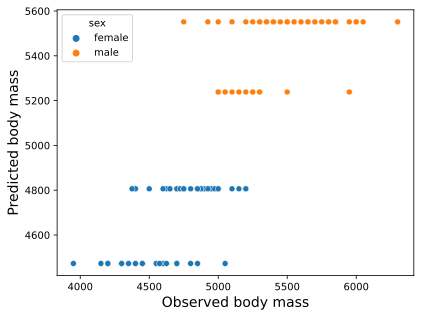

In [9]:
# Plot observed vs. predictions
p = sns.scatterplot(data=gentoo, x='body_mass_g', y='pred', hue='sex')
p.set_xlabel('Observed body mass', fontsize=14)
p.set_ylabel('Predicted body mass', fontsize=14)

In [10]:
# Calculate MSE
metrics.mean_squared_error(gentoo['pred'], y)

66232.20299920668